# Quant_1_basic--数据处理及画图

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
mpl.rcParams['font.sans-serif'] =['SimHei']
mpl.rcParams['axes.unicode_minus'] = False #解决负号是方块的问题
%matplotlib inline
import warnings; warnings.simplefilter('ignore')
import tushare as ts


In [6]:
#数据预处理，转为datetime index

In [7]:
hs300 = ts.get_k_data('600030','2011-01-01','2018-08-25')

In [8]:
hs300.set_index('date',inplace=True)

In [9]:
hs300.index = pd.DatetimeIndex(hs300.index)

1.数据处理(numpy&pandas)

1.1 选择

注：np.random.randn比np.random.standard_normal更加灵活，可以生成多维的
   np.polyfit(m,n,3) #做回归计算的 np.polyval验算结果

In [82]:
#以下类似
#类似方法，其中ix由于有歧义，所以省略
hs300[hs300.index<'2011-02'][['close','open']]
hs300.loc[hs300.index<'2011-02'][['close','open']]
hs300.iloc[hs300.index<'2011-02'][['close','open']]
hs300.loc[hs300.index<'2011-02'][1:3]

,open,close,high,low,volume,code,return_1,return_2,cum_return_1,return_3,cum_return_2
date,,,,,,,,,,,
2011-01-05,10.472,10.398,10.529,10.3,713173.0,600030,-0.017759,-0.017759,0.982241,-0.017919,0.982241
2011-01-06,10.431,10.341,10.586,10.3,563811.0,600030,-0.005482,-0.005482,0.976856,-0.005497,0.976856


In [94]:
hs300.ix[hs300.index<'2011-02',['close','open']]

,close,open
date,,
2011-01-04,10.586,10.382
2011-01-05,10.398,10.472
2011-01-06,10.341,10.431
2011-01-07,10.439,10.300
2011-01-10,10.161,10.365
2011-01-11,10.251,10.120
2011-01-12,10.365,10.308
2011-01-13,10.292,10.423
2011-01-14,10.071,10.218


1.2 拼接

2.计算收益

In [10]:
#2.1离散法： pt/p(t-1) -1 单天的return. HPR

In [11]:
hs300['return_1'] = hs300['close']/hs300['close'].shift(1) -1

In [12]:
hs300['return_2'] = hs300['close'].pct_change()

In [13]:
hs300['cum_return_1'] = (hs300['return_2'] + 1).cumprod()

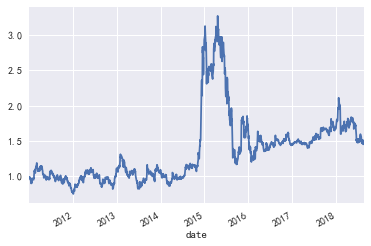

In [14]:
hs300['cum_return_1'].plot()

In [15]:
#2.2连续法 ln(pt/p(t-1)) 单天的return

In [16]:
hs300['return_3'] = np.log(hs300['close']/hs300['close'].shift(1))

In [17]:
hs300['cum_return_2'] =  hs300['return_3'].cumsum().apply(np.exp)

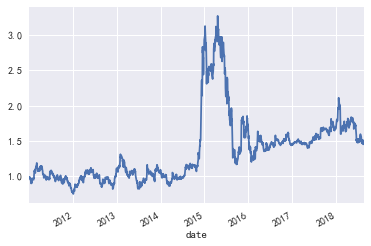

In [18]:
hs300['cum_return_2'].plot()

3.可视化

3.1 pandas内置

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CE436A0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D3DACC0>], dtype=object)

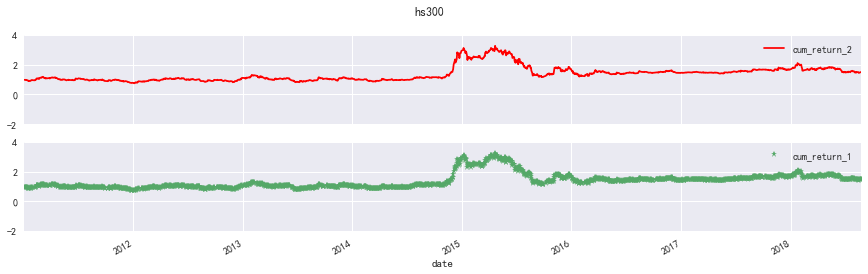

In [19]:
hs300[['cum_return_2','cum_return_1']].plot(figsize =(15,4),title = 'hs300',style=['r-','*'],ylim=[-2,4],subplots = True,sort_columns=True)

Series.plot方法的函数：

参数	说明
label	用于图例的标签
ax	要在其上进行绘制的matplotlib subplot对象。如果没有设置，则使用当前matplotlib subplot
style	将要传给matplotlib的风格字符串(for example: ‘ko–’)
alpha	图表的填充不透明(0-1)
kind	可以是’line’, ‘bar’, ‘barh’, ‘kde’,'scatter' 要先设定xy轴名字（x=,y=）
logy	在Y轴上使用对数标尺
use_index	将对象的索引用作刻度标签
rot	旋转刻度标签(0-360)
xticks	用作X轴刻度的值
yticks	用作Y轴刻度的值
xlim	X轴的界限
ylim	Y轴的界限
grid	显示轴网格线
scecondary_y 分别在不同的y轴刻度显示

DataFrame还有一些用于对列进行灵活处理的选项，例如，要将所有列都绘制到一个subplot中还是创建各自的subplot。参数如下表:
参数	说明
subplots	将各个DataFrame列绘制到单独的subplot中
sharex	如果subplots=True，则共用同一个X轴，包括刻度和界限
sharey	类似于上
figsize	表示图像大小的元组
title	表示图像标题的字符串
legend	添加一个subplot图例(默认b为True)
sort_columns	以字母表顺序绘制各列，默认使用前列顺序

对于DataFrame， 柱形图会将每一行的值分为一组。DataFrame的各列名称都被用作了图例的标题。设置stacked=True即可为DataFrame生成堆积柱形图，这样每行的值就会被堆积在一起。df.plot(kind='barh', stacked=True, alpha=0.5)

直方图和密度图
直方图(histogram)是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制的是各面元中数据点的数量。Series.hist()。在之后调用plot时加上参数kind='kde'即可生成一张密度图。

散布图
散布图(scatter plot)是观察两个一维数据序列之间的关系的有效手段。matplotlib的scatter方法是绘制散布图的主要方法。利用plt.scatter()即可轻松绘制一张简单的直方图。而且，pandas提供了下一个能从DataFrame创建散步图矩阵的scatter_matrix函数。它还支持在对角线上放置个变量的直方图或密度图。

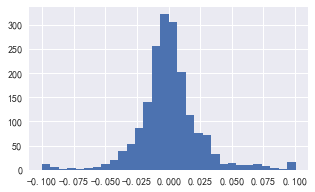

In [20]:
hs300['return_1'].hist(bins=30,figsize=(5,3))

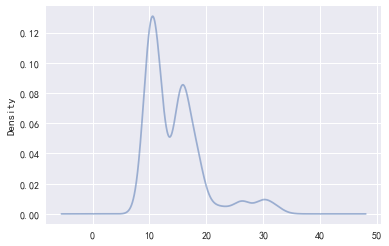

In [21]:
hs300['close'].plot(kind='kde', stacked=True, alpha=0.5)

3.2 matplotlib

如果不想每次使用matplotlib时都在代码部分进行配置，可以修改matplotlib的文件参数。可以用matplot.get_config()命令来找到当前用户的配置文件目录。
配置文件包括以下配置项：
axex: 设置坐标轴边界和表面的颜色、坐标刻度值大小和网格的显示
backend: 设置目标暑促TkAgg和GTKAgg
figure: 控制dpi、边界颜色、图形大小、和子区( subplot)设置
font: 字体集（font family）、字体大小和样式设置
grid: 设置网格颜色和线性
legend: 设置图例和其中的文本的显示
line: 设置线条（颜色、线型、宽度等）和标记
patch: 是填充2D空间的图形对象，如多边形和圆。控制线宽、颜色和抗锯齿设置等。
savefig: 可以对保存的图形进行单独设置。例如，设置渲染的文件的背景为白色。
verbose: 设置matplotlib在执行期间信息输出，如silent、helpful、debug和debug-annoying。
xticks和yticks: 为x,y轴的主刻度和次刻度设置颜色、大小、方向，以及标签大小。

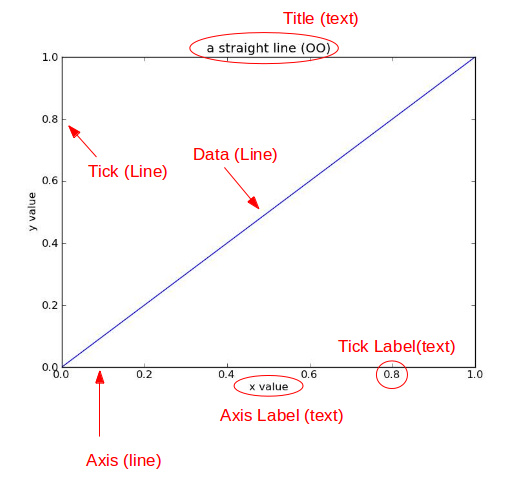

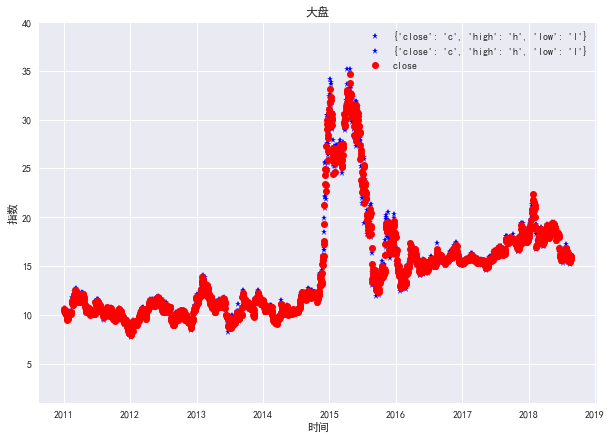

In [22]:
plt.figure(figsize=(10,7))
plt.title('大盘')
plt.xlabel('时间')
plt.ylabel('指数')
plt.ylim(1,40)
plt.plot(hs300[['high','low']],'b*', label={'close' :'c','high':'h','low':'l'})   #注意关键词位置,可以多个数据按顺序传：数据--参数--数据
plt.plot(hs300['close'],'ro',label='close') 
plt.legend()
#plt.scatter()
plt.subplot()
plt.grid(True)
#plt.bar()
plt.show()

In [23]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 '_classic_test']

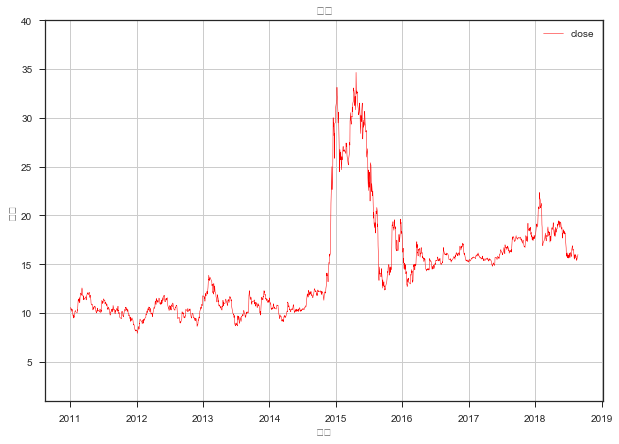

In [24]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(10,7))
plt.title('大盘')
plt.xlabel('时间')
plt.ylabel('指数')
plt.ylim(1,40)
plt.plot(hs300['close'],'r-',label='close',linewidth=0.5) 
plt.legend()
#plt.scatter()
plt.subplot()
plt.grid(True)
#plt.bar()
plt.show()

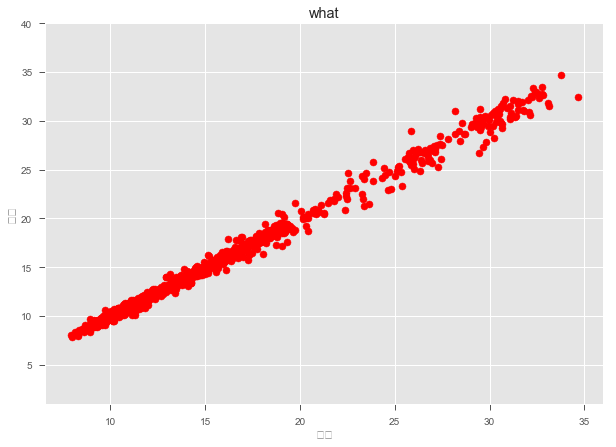

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.title('what')
plt.xlabel('时间')
plt.ylabel('指数')
plt.ylim(1,40)
plt.scatter(hs300['close'],hs300['open'],color='r') #分别指定x,y
#plt.legend()  #加了会把y当图例
plt.subplot()
plt.grid(True)
plt.show()

In [26]:
#一张图用两个y轴

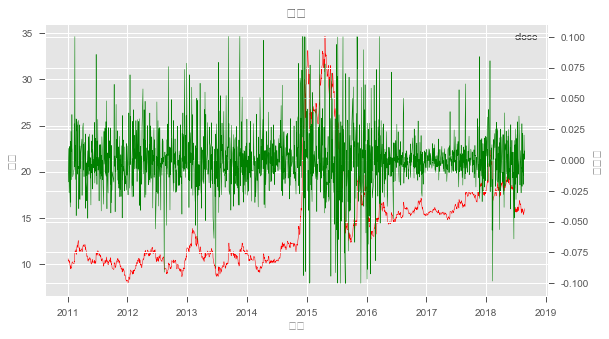

In [27]:
fig1, ax =plt.subplots(figsize=(9,5))
plt.title('大盘')
plt.xlabel('时间')
plt.ylabel('指数')
plt.plot(hs300['close'],'r-',linewidth=0.5,label='close') 
plt.legend()

ax2 = ax.twinx()
plt.plot(hs300['return_1'],'g',lw=0.5,label='low') 
plt.ylabel('百分比')

In [28]:
#画子图

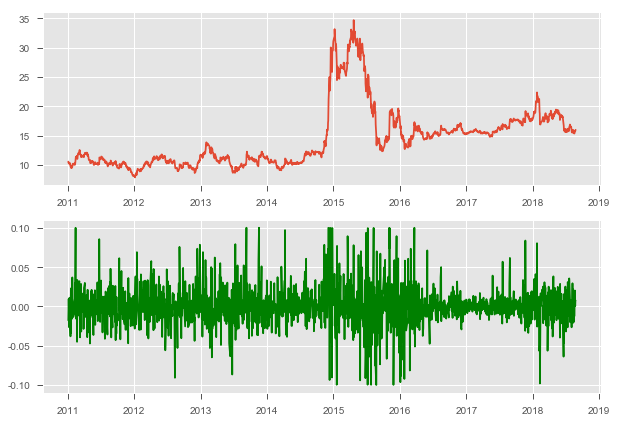

In [29]:
plt.figure(figsize=(10,7))
plt.subplot(211)
plt.plot(hs300['close'])

plt.subplot(212)
plt.plot(hs300['return_1'],'g')

3.3 seaborn

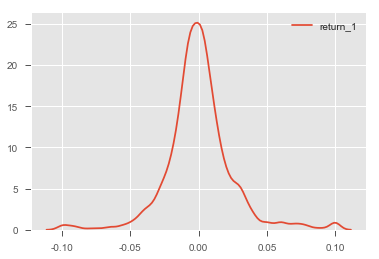

In [30]:
sns.kdeplot(hs300['return_1']) #核密度估计

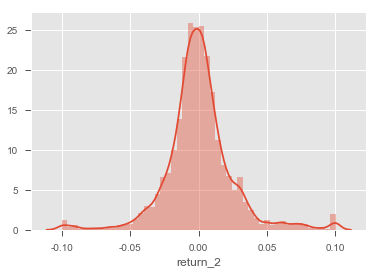

In [31]:
sns.distplot(hs300['return_2'].dropna()) #核密度估计+统计柱状图

In [32]:
#两个列的皮尔森相关系数

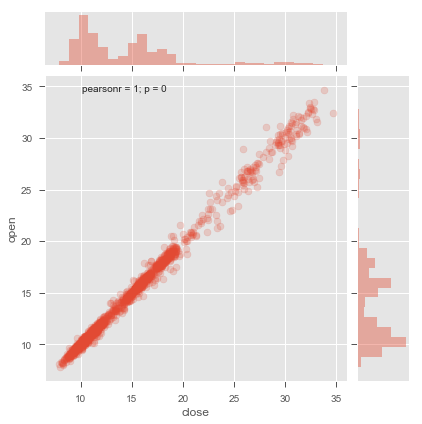

In [33]:
sns.jointplot(hs300['close'],hs300['open'],alpha=0.2)

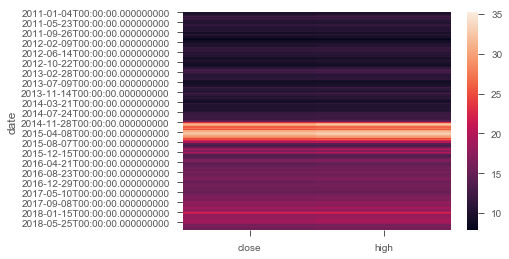

In [36]:
sns.heatmap(hs300[['close','high']])